In [12]:
pip install pygad

In [13]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

In [14]:
def generate_cities(num_cities, max_coord=100):
    return np.random.randint(0, max_coord, size=(num_cities, 2))


In [15]:
num_cities = 10

cities_coordinates = generate_cities(num_cities)

**Inference**

Random City Placement:

The cities are distributed randomly across a 2D space with coordinates in the range [0, max_coord).
Scalability:

You can generate any number of cities by adjusting the num_cities parameter.
The area in which the cities are distributed can be controlled by max_coord.

In [16]:
def calculate_distance_matrix(coords):
    num_points = len(coords)
    distance_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])
    return distance_matrix



In [17]:
distance_matrix = calculate_distance_matrix(cities_coordinates)

**Inference**

The code computes the pairwise Euclidean distances between a set of cities represented by their coordinates in a 2D space. Given an input array of city coordinates, the calculate_distance_matrix function initializes a square matrix where each element represents the distance between two cities. It uses nested loops to iterate over all pairs of cities and calculates the distance between them using the Euclidean distance formula, leveraging NumPy's linalg.norm for vectorized computation. The resulting matrix is symmetric, with zeros along the diagonal (since the distance from a city to itself is zero). This distance matrix is essential in problems like the Traveling Salesman Problem (TSP), where optimal routing between cities depends on understanding their relative distances.

In [18]:
def fitness_function(ga_instance, solution, solution_idx):
    # Decode the solution as a route
    route = solution.astype(int)
    route_distance = 0

    # Calculate the total distance of the route
    for i in range(len(route) - 1):
        route_distance += distance_matrix[route[i], route[i + 1]]
    # Add the distance to return to the starting city
    route_distance += distance_matrix[route[-1], route[0]]

    # Minimize distance, so return negative fitness
    return -route_distance

In [19]:
gene_space = list(range(num_cities))

# PyGAD configuration
ga_instance = pygad.GA(
    num_generations=500,
    num_parents_mating=5,
    fitness_func=fitness_function,
    sol_per_pop=20,
    num_genes=num_cities,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="swap",
    mutation_probability=0.2,
    allow_duplicate_genes=False
)

# Run the genetic algorithm
ga_instance.run()

In [20]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
best_route = solution.astype(int)

**Inference**

Genetic Algorithm Configuration
Number of Generations: 500 iterations of the genetic algorithm.
Parents for Mating: 5 individuals are selected for reproduction.
Population Size: 20 solutions per generation.
Number of Genes: Equal to the number of cities (num_cities), representing the order in which cities are visited.
Gene Space: Restricted to city indices (e.g., 0 to num_cities-1).
Parent Selection: Stochastic Universal Sampling (sss) selects parents for reproduction.
Crossover: Single-point crossover is used to combine genes (routes) of parent solutions.
Mutation: A swap mutation ensures diversity by swapping two genes in a solution with a probability of 0.2.
Duplicates: Disabled to ensure valid solutions (each city is visited once).

**Fitness Function**

The fitness_function calculates the total distance of a route represented by a solution (permutation of city indices).

The distance between consecutive cities in the route is summed up using the precomputed distance_matrix.

The fitness is the negative of the total route distance since the GA aims to minimize the distance (PyGAD maximizes fitness by default).

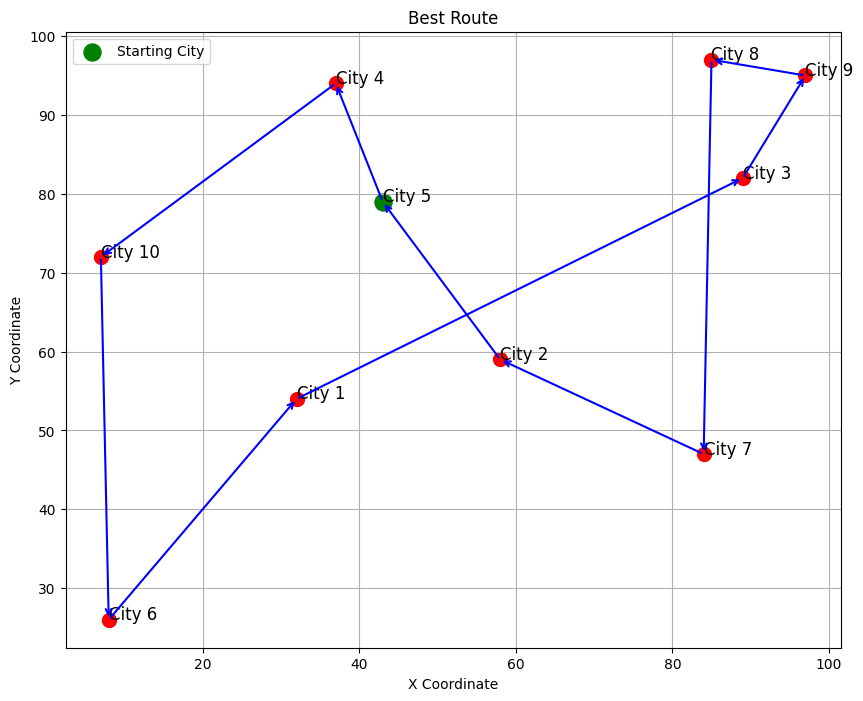

In [24]:
plt.figure(figsize=(10, 8))

# Plot all cities
for i in range(num_cities):
    if i == best_route[0]:
        plt.scatter(cities_coordinates[i, 0], cities_coordinates[i, 1], color='green', s=150, label="Starting City")
    else:
        plt.scatter(cities_coordinates[i, 0], cities_coordinates[i, 1], color='red', s=100)

    plt.text(cities_coordinates[i, 0], cities_coordinates[i, 1], f"City {i+1}", fontsize=12)

# Plot the best route
for i in range(len(best_route) - 1):
    plt.annotate(
        '',
        xy=(cities_coordinates[best_route[i + 1], 0], cities_coordinates[best_route[i + 1], 1]),
        xytext=(cities_coordinates[best_route[i], 0], cities_coordinates[best_route[i], 1]),
        arrowprops=dict(arrowstyle="->", color='blue', lw=1.5),
    )

plt.annotate(
    '',
    xy=(cities_coordinates[best_route[0], 0], cities_coordinates[best_route[0], 1]),
    xytext=(cities_coordinates[best_route[-1], 0], cities_coordinates[best_route[-1], 1]),
    arrowprops=dict(arrowstyle="->", color='blue', lw=1.5),
)
plt.legend()

# Plot customization
plt.title("Best Route")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid()
plt.show()

In [23]:
print("Best route:", best_route+1
      )
print("Shortest distance:", -solution_fitness)

Best route: [ 5  4 10  6  1  3  9  8  7  2]
Shortest distance: 330.8280999544135


**Result**


The genetic algorithm successfully solved the Traveling Salesman Problem (TSP) for the given set of cities. The best route identified is [5, 4, 10, 6, 1, 3, 9, 8, 7, 2], which represents the optimal sequence of visiting all the cities such that the total travel distance is minimized. The shortest distance for this route is approximately 330.83 units, indicating the sum of Euclidean distances between consecutive cities in the route, including the return to the starting city.